# Final Model Construction

Below is the construction for a multiple linear regression model predicting housing prices in King County. Data is imported from the preprocessed data that was cleaned in preceding notebooks and saved as separate csv files. The data is imported to this notebook and combined for the first model. Further iterations are contained in additional subsections of this notebook.

### Import Packages

In [51]:
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import median_absolute_error, mean_squared_error 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.linear_model import LinearRegression



### Import and Combine Cleaned Data

In [52]:
categorical_ohe = pd.read_csv("./data/cat_hot_dataframe")
categorical_ordinal = pd.read_csv("./data/cat_ordinal_dataframe")
numeric = pd.read_csv("./data/initial_numeric_inputs")
target = pd.read_csv("./data/house_price_target_natlog")

### Construct Model

In [53]:
all_predictors = pd.concat([numeric, categorical_ohe, categorical_ordinal], axis=1)

In [54]:
#defining constructor function so it can be used for each iteration

def construct_model(exog_df, endog=target):
    ''' This function takes a dataframe of feature variables, performs robust scaling, 
    and returns summary statistics. '''
   
    rscale = RobustScaler()
    rs = rscale.fit_transform(exog_df)
    rs_df = pd.DataFrame(rs, columns=exog_df.columns, index=exog_df.index)
    
    exog = sm.add_constant(rs_df)
    
    model = sm.OLS(endog, exog).fit().summary()
    return model

# 1st Iteration

In [55]:
#run 1st model

#concatenate numeric and target to run a correlation
run_corr = pd.concat([target, numeric], axis=1)
run_corr.corr()['ln_price'].sort_values(ascending=False)

ln_price            1.000000
ln_sqft_living      0.674802
ln_sqft_living15    0.607154
ln_sqft_above       0.586013
bathrooms           0.551249
bedrooms            0.343360
floors              0.310630
sqft_lot            0.100025
sqft_lot15          0.092281
renovated           0.044384
age                -0.080583
Name: ln_price, dtype: float64

Since ln_sqft_living is our highest correlated variable to ln_price, we will use it to run our first regression

In [56]:
# run first model
construct_model(pd.DataFrame(all_predictors['ln_sqft_living']))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0517      0.003   4935.519      0.000      13.046      13.057
ln_sqft_living     0.4845      0.004    134.368      0.000       0.477       0.492
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         1.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluate Model Performance

The model accounts for roughly 45% of the target variable variance. ln_sqft_living is statistically signficant with a pvalue less than our alpha at .05. A one unit in iqr of log_sqft_living will increase our log_price by .4845.

### Assess Potential Model Improvements

(1) Increase our rsquared with additional variables

(2) Trim outliers as needed to imrove normality of inputs (JB Score)

# 2nd Iteration

In [57]:
# create a function that concatenates our next feature variable to our exog dataframe
current_model = pd.DataFrame(all_predictors['ln_sqft_living'])

def iterate(feature):
    feature_df = pd.DataFrame(feature)
    model = pd.concat([current_model, feature_df], axis=1)
    return model

In [58]:
# run 2nd model adding ln_sqft_living15
current_model = iterate(all_predictors['ln_sqft_living15'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9944.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -9742.3
No. Observations:               21597   AIC:                         1.949e+04
Df Residuals:                   21594   BIC:                         1.951e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0425      0.003   5013.451      0.000      13.037      13.048
ln_sqft_living       0.3594      0.005     67.795      0.000       0.349       0.370
ln_sqft_living15     0.1725      0.005     31.603      0.000       0.162       0.183
==============================================================================
Omnibus:                      150.085   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.925
Skew:                           0.128   Prob(JB):                     2.75e-28
Kurtosis:                       2.726   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

R2 value was increased, however, some multicollinearity was observed and there are still significant deviations from normality in our inputs overall.

# 3rd Iteration

In [59]:
# run 3rd model
current_model = iterate(all_predictors['ln_sqft_above'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     6649.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -9727.0
No. Observations:               21597   AIC:                         1.946e+04
Df Residuals:                   21593   BIC:                         1.949e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0454      0.003   4923.924      0.000      13.040      13.051
ln_sqft_living       0.3892      0.008     51.510      0.000       0.374       0.404
ln_sqft_living15     0.1787      0.006     32.091      0.000       0.168       0.190
ln_sqft_above       -0.0421      0.008     -5.529      0.000      -0.057      -0.027
==============================================================================
Omnibus:                      135.412   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.075
Skew:                           0.130   Prob(JB):                     2.29e-26
Kurtosis:                       2.748   Cond. No.                         4.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

R2 indicates our model's correlation has improved marginally, however, normality has also been significantly improved. Feature will be retained.

# 4th Iteration

In [60]:
# run 4th model
# add bathrooms
current_model = iterate(all_predictors['bathrooms'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     5058.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -9652.9
No. Observations:               21597   AIC:                         1.932e+04
Df Residuals:                   21592   BIC:                         1.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0542      0.003   4765.913      0.000      13.049      13.060
ln_sqft_living       0.3462      0.008     41.654      0.000       0.330       0.363
ln_sqft_living15     0.1799      0.006     32.403      0.000       0.169       0.191
ln_sqft_above       -0.0527      0.008     -6.899      0.000      -0.068      -0.038
bathrooms            0.0476      0.004     12.193      0.000       0.040       0.055
==============================================================================
Omnibus:                      148.808   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.488
Skew:                           0.129   Prob(JB):                     3.42e-28
Kurtosis:                       2.728   Cond. No.                         5.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements¶

R2 value indicates the model has increased correlation strength at the cost of slightly increased collinearity and decreased normality in our inputs. Feature retained.

# 5th Iteration

In [61]:
# run 4th model
# add bedrooms
current_model = iterate(all_predictors['bedrooms'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     4171.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -9493.3
No. Observations:               21597   AIC:                         1.900e+04
Df Residuals:                   21591   BIC:                         1.905e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0804      0.003   4238.259      0.000      13.074      13.086
ln_sqft_living       0.4021      0.009     45.591      0.000       0.385       0.419
ln_sqft_living15     0.1699      0.006     30.667      0.000       0.159       0.181
ln_sqft_above       -0.0587      0.008     -7.727      0.000      -0.074      -0.044
bathrooms            0.0536      0.004     13.775      0.000       0.046       0.061
bedrooms            -0.0638      0.004    -17.933      0.000      -0.071      -0.057
==============================================================================
Omnibus:                      110.041   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.321
Skew:                           0.143   Prob(JB):                     2.22e-23
Kurtosis:                       2.815   Cond. No.                         6.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements¶

R2 and JB have both been significantly improved by the new feature, albeit at a slight cost to collinearity. Feature retained.

# 6th Iteration

In [62]:
# run 6th model
# add floors
current_model = iterate(all_predictors['floors'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3541.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -9393.0
No. Observations:               21597   AIC:                         1.880e+04
Df Residuals:                   21590   BIC:                         1.886e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0792      0.003   4255.798      0.000      13.073      13.085
ln_sqft_living       0.4401      0.009     47.952      0.000       0.422       0.458
ln_sqft_living15     0.1798      0.006     32.350      0.000       0.169       0.191
ln_sqft_above       -0.1201      0.009    -13.792      0.000      -0.137      -0.103
bathrooms            0.0316      0.004      7.589      0.000       0.023       0.040
bedrooms            -0.0588      0.004    -16.519      0.000      -0.066      -0.052
floors               0.0898      0.006     14.196      0.000       0.077       0.102
==============================================================================
Omnibus:                      107.876   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.331
Skew:                           0.157   Prob(JB):                     8.14e-24
Kurtosis:                       2.860   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements¶

New feature increased R2 value, although it caused increased skew/JB significance and collinearity. Feature retained due to additional increase in kurtosis.

# 7th Iteration

In [63]:
# run 7th model
# add sqft_lot
current_model = iterate(all_predictors['sqft_lot'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3035.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -9392.7
No. Observations:               21597   AIC:                         1.880e+04
Df Residuals:                   21589   BIC:                         1.887e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0795      0.003   4199.821      0.000      13.073      13.086
ln_sqft_living       0.4402      0.009     47.956      0.000       0.422       0.458
ln_sqft_living15     0.1799      0.006     32.356      0.000       0.169       0.191
ln_sqft_above       -0.1195      0.009    -13.641      0.000      -0.137      -0.102
bathrooms            0.0316      0.004      7.589      0.000       0.023       0.040
bedrooms            -0.0590      0.004    -16.520      0.000      -0.066      -0.052
floors               0.0893      0.006     14.043      0.000       0.077       0.102
sqft_lot            -0.0002      0.000     -0.670      0.503      -0.001       0.000
==============================================================================
Omnibus:                      106.847   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.296
Skew:                           0.156   Prob(JB):                     1.37e-23
Kurtosis:                       2.861   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# no change in rqsquared, dropping from exog dataframe
current_model.drop(labels='sqft_lot', axis=1, inplace=True)

### Assess Potential Model Improvements¶

feature dropped from successive models due to an unacceptable increase in collinearity for a negligible increase in correlation strength or other parameters.

# 8th Iteration

In [65]:
# run 8th model
# add sqft_lot15
current_model = iterate(all_predictors['sqft_lot15'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3043.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -9379.4
No. Observations:               21597   AIC:                         1.877e+04
Df Residuals:                   21589   BIC:                         1.884e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0819      0.003   4199.713      0.000      13.076      13.088
ln_sqft_living       0.4406      0.009     48.029      0.000       0.423       0.459
ln_sqft_living15     0.1812      0.006     32.590      0.000       0.170       0.192
ln_sqft_above       -0.1151      0.009    -13.146      0.000      -0.132      -0.098
bathrooms            0.0314      0.004      7.538      0.000       0.023       0.040
bedrooms            -0.0605      0.004    -16.920      0.000      -0.067      -0.053
floors               0.0859      0.006     13.511      0.000       0.073       0.098
sqft_lot15          -0.0025      0.000     -5.206      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       97.692   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.246
Skew:                           0.149   Prob(JB):                     1.26e-21
Kurtosis:                       2.865   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# no change in rqsquared, dropping from exog dataframe
current_model.drop(labels='sqft_lot15', axis=1, inplace=True)

### Assess Potential Model Improvements¶

feature dropped from successive models due to an unacceptable increase in collinearity for a negligible increase in correlation strength or other parameters.

# 9th Iteration

In [67]:
# run 9th model
# add renovated
current_model = iterate(all_predictors['renovated'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3055.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -9357.6
No. Observations:               21597   AIC:                         1.873e+04
Df Residuals:                   21589   BIC:                         1.879e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0677      0.003   3893.430      0.000      13.061      13.074
ln_sqft_living       0.4382      0.009     47.805      0.000       0.420       0.456
ln_sqft_living15     0.1811      0.006     32.631      0.000       0.170       0.192
ln_sqft_above       -0.1197      0.009    -13.762      0.000      -0.137      -0.103
bathrooms            0.0314      0.004      7.547      0.000       0.023       0.040
bedrooms            -0.0583      0.004    -16.396      0.000      -0.065      -0.051
floors               0.0902      0.006     14.283      0.000       0.078       0.103
renovated            0.0523      0.006      8.420      0.000       0.040       0.065
==============================================================================
Omnibus:                      100.899   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.179
Skew:                           0.151   Prob(JB):                     2.91e-22
Kurtosis:                       2.860   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# no change in rqsquared, dropping from exog dataframe
current_model.drop(labels='renovated', axis=1, inplace=True)

### Assess Potential Model Improvements

feature dropped from successive models due to an unacceptable increase in collinearity for a negligible increase in correlation strength or other parameters.

# 10th Iteration

In [69]:
# run 10th model
# add conditional ordinal encoded
current_model = iterate(categorical_ordinal['cond_ord'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     3178.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -9144.4
No. Observations:               21597   AIC:                         1.830e+04
Df Residuals:                   21589   BIC:                         1.837e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0430      0.003   3790.858      0.000      13.036      13.050
ln_sqft_living       0.4170      0.009     45.666      0.000       0.399       0.435
ln_sqft_living15     0.1862      0.006     33.844      0.000       0.175       0.197
ln_sqft_above       -0.1027      0.009    -11.875      0.000      -0.120      -0.086
bathrooms            0.0370      0.004      8.957      0.000       0.029       0.045
bedrooms            -0.0632      0.004    -17.923      0.000      -0.070      -0.056
floors               0.1119      0.006     17.685      0.000       0.100       0.124
cond_ord             0.0909      0.004     22.420      0.000       0.083       0.099
==============================================================================
Omnibus:                      110.767   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.195
Skew:                           0.168   Prob(JB):                     7.15e-25
Kurtosis:                       2.897   Cond. No.                         7.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

Significant increase in the model's correlation strength and slight increase in skew. Feature retained due to increased kurtosis and correlation strength.

# 11th Iteration

In [70]:
# run 11th model
# add grade ordinal encoded
current_model = iterate(categorical_ordinal['grade_ord'])
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     3684.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -7496.0
No. Observations:               21597   AIC:                         1.501e+04
Df Residuals:                   21588   BIC:                         1.508e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.8920      0.004   3167.352      0.000      12.884      12.900
ln_sqft_living       0.3160      0.009     36.619      0.000       0.299       0.333
ln_sqft_living15     0.1019      0.005     19.267      0.000       0.092       0.112
ln_sqft_above       -0.1669      0.008    -20.648      0.000      -0.183      -0.151
bathrooms           -0.0030      0.004     -0.768      0.443      -0.011       0.005
bedrooms            -0.0267      0.003     -8.047      0.000      -0.033      -0.020
floors               0.0658      0.006     11.123      0.000       0.054       0.077
cond_ord             0.1011      0.004     26.880      0.000       0.094       0.108
grade_ord            0.2030      0.003     59.669      0.000       0.196       0.210
==============================================================================
Omnibus:                       89.518   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.529
Skew:                           0.158   Prob(JB):                     2.20e-20
Kurtosis:                       3.037   Cond. No.                         9.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

signficant improvement in all metrics except for collinearity. Model is still within limits of collinearity assumption (Cond. No. <10), so feature is retained.

# 12th Iteration

In [71]:
# run 12th model
# removes condition of house variable to assess impact on collinearity
current_model.drop(labels='cond_ord', axis=1, inplace=True)
construct_model(current_model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     3974.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:59   Log-Likelihood:                -7851.5
No. Observations:               21597   AIC:                         1.572e+04
Df Residuals:                   21589   BIC:                         1.578e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.9353      0.004   3403.537      0.000      12.928      12.943
ln_sqft_living       0.3437      0.009     39.462      0.000       0.327       0.361
ln_sqft_living15     0.0965      0.005     17.964      0.000       0.086       0.107
ln_sqft_above       -0.1849      0.008    -22.588      0.000      -0.201      -0.169
bathrooms           -0.0081      0.004     -2.051      0.040      -0.016      -0.000
bedrooms            -0.0226      0.003     -6.709      0.000      -0.029      -0.016
floors               0.0421      0.006      7.088      0.000       0.030       0.054
grade_ord            0.1988      0.003     57.556      0.000       0.192       0.206
==============================================================================
Omnibus:                       86.227   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.192
Skew:                           0.155   Prob(JB):                     1.17e-19
Kurtosis:                       2.966   Cond. No.                         9.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

Model suffered penalties to correlation strength without improving collinearity. Feature will be retained in possible final model.

# 13th Iteration

In [72]:
# run 13th model
# add grade ordinal encoded
# assessing whether one-hot-encoding offers performance benefits compared to ordinal encoding for 
# categorical variables/features.
current_model.drop(labels='grade_ord', axis=1, inplace=True)
ohe_df = pd.concat([current_model, categorical_ohe], axis=1)
construct_model(ohe_df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1502.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:59   Log-Likelihood:                -7374.7
No. Observations:               21597   AIC:                         1.479e+04
Df Residuals:                   21576   BIC:                         1.496e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.5321      0.012   1135.897      0.000      13.509      13.555
ln_sqft_living       0.3293      0.009     38.111      0.000       0.312       0.346
ln_sqft_living15     0.0993      0.005     18.653      0.000       0.089       0.110
ln_sqft_above       -0.1788      0.008    -22.062      0.000      -0.195      -0.163
bathrooms           -0.0052      0.004     -1.327      0.185      -0.013       0.002
bedrooms            -0.0238      0.003     -7.190      0.000      -0.030      -0.017
floors               0.0740      0.006     12.293      0.000       0.062       0.086
x0_Fair             -0.0993      0.027     -3.740      0.000      -0.151      -0.047
x0_Good              0.0853      0.006     15.122      0.000       0.074       0.096
x0_Poor             -0.0228      0.064     -0.358      0.720      -0.148       0.102
x0_Very Good         0.2247      0.009     24.996      0.000       0.207       0.242
x0_11 Excellent      0.2406      0.020     12.038      0.000       0.201       0.280
x0_12 Luxury         0.5352      0.038     14.145      0.000       0.461       0.609
x0_13 Mansion        0.9808      0.095     10.271      0.000       0.794       1.168
x0_3 Poor           -0.8097      0.341     -2.373      0.018      -1.479      -0.141
x0_4 Low            -0.9828      0.068    -14.438      0.000      -1.116      -0.849
x0_5 Fair           -0.9333      0.027    -34.235      0.000      -0.987      -0.880
x0_6 Low Average    -0.7833      0.017    -46.396      0.000      -0.816      -0.750
x0_7 Average        -0.6459      0.014    -47.821      0.000      -0.672      -0.619
x0_8 Good           -0.4648      0.012    -38.202      0.000      -0.489      -0.441
x0_9 Better         -0.2272      0.012    -18.456      0.000      -0.251      -0.203
==============================================================================
Omnibus:                       68.736   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.357
Skew:                           0.139   Prob(JB):                     8.70e-16
Kurtosis:                       2.991   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

Replacing ordinal encoding with one-hot-encoding results in mild improvement to correlation strength, but also results in unacceptable collinearity increase.

# 14th Iteration

In [73]:
# run 13th model
# add grade ordinal encoded
ohe_df.drop(labels=['x0_Fair', 'x0_Good', 'x0_Poor', 'x0_Very Good'], axis=1, inplace=True)
construct_model(ohe_df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1768.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:59   Log-Likelihood:                -7745.4
No. Observations:               21597   AIC:                         1.552e+04
Df Residuals:                   21580   BIC:                         1.566e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.5611      0.012   1125.553      0.000      13.537      13.585
ln_sqft_living       0.3576      0.009     40.976      0.000       0.341       0.375
ln_sqft_living15     0.0940      0.005     17.387      0.000       0.083       0.105
ln_sqft_above       -0.1983      0.008    -24.150      0.000      -0.214      -0.182
bathrooms           -0.0093      0.004     -2.364      0.018      -0.017      -0.002
bedrooms            -0.0199      0.003     -5.905      0.000      -0.026      -0.013
floors               0.0526      0.006      8.727      0.000       0.041       0.064
x0_11 Excellent      0.2372      0.020     11.669      0.000       0.197       0.277
x0_12 Luxury         0.5324      0.038     13.833      0.000       0.457       0.608
x0_13 Mansion        0.9687      0.097      9.972      0.000       0.778       1.159
x0_3 Poor           -0.5998      0.347     -1.728      0.084      -1.280       0.080
x0_4 Low            -0.9858      0.069    -14.269      0.000      -1.121      -0.850
x0_5 Fair           -0.9067      0.028    -32.918      0.000      -0.961      -0.853
x0_6 Low Average    -0.7633      0.017    -44.545      0.000      -0.797      -0.730
x0_7 Average        -0.6335      0.014    -46.149      0.000      -0.660      -0.607
x0_8 Good           -0.4571      0.012    -36.958      0.000      -0.481      -0.433
x0_9 Better         -0.2246      0.013    -17.936      0.000      -0.249      -0.200
==============================================================================
Omnibus:                       70.877   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.307
Skew:                           0.137   Prob(JB):                     3.28e-16
Kurtosis:                       2.936   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assess Potential Model Improvements

Similar trade-offs observed with 13th and 14th models. Due to collinearity increase, ordinal encoding is preferred for the final model despite correlation strength improvement.

# Preparing the Final Model

In [74]:
#12th iteration was the best fit we could produce with our available features without violating assumptions
#here we recreate that dataset for use in the final model
semi_final_df = pd.concat([target, numeric, categorical_ordinal], axis=1)

In [75]:
semi_final_df.drop(labels=['sqft_lot', 'age', 'renovated', 'sqft_lot15'], axis=1, inplace=True)

TypeError: 'str' object is not callable

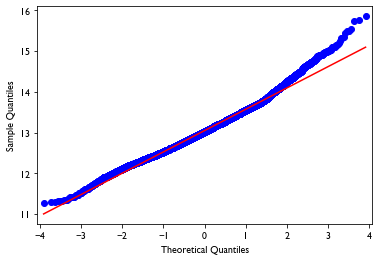

In [76]:
#QQ plot generated for each feature to identify outliers that may need to be dropped before 
#the final model is created
for e, f in enumerate(semi_final_df.columns):
    sm.qqplot(semi_final_df[f], line='r');
    plt.title(f)

QQ plot indicates that bedrooms are significantly affected by outliers, and bathrooms may be significantly skewed/non-normally distributed. Final iteration of our model will experiment with removal of bathrooms as a feature and trimming outliers from the dataset that are affecting bedroom regression modeling. 

### Additional feature cleaning

In [77]:
#identify houses with the most bedrooms (top 10)
bed_10 = semi_final_df.sort_values(by="bedrooms", ascending=False)[0:10]
bed_10

,ln_price,bedrooms,bathrooms,ln_sqft_living,floors,ln_sqft_above,ln_sqft_living15,cond_ord,grade_ord
15856,13.369223,33,1.75,7.390181,1.0,6.946976,7.192934,4.0,4.0
8748,13.161584,11,3.00,8.006368,2.0,7.783224,7.258412,2.0,4.0
13301,13.955273,10,5.25,8.431635,1.0,7.824046,7.912057,2.0,6.0
19239,13.399995,10,3.00,7.979339,2.0,7.528332,7.501082,3.0,4.0
15147,13.384728,10,2.00,8.191463,2.0,8.009695,7.620705,3.0,4.0
6073,14.062371,9,4.50,8.202482,2.0,7.835975,7.828038,2.0,5.0
4231,13.458836,9,3.00,8.210668,2.0,7.948032,7.580700,2.0,4.0
16830,14.151983,9,4.00,8.438150,2.5,8.261010,7.904704,2.0,8.0
8537,13.017003,9,7.50,8.306472,2.0,8.306472,7.277939,2.0,4.0
4092,13.304683,9,4.50,8.250620,2.5,7.803843,7.286192,2.0,4.0


In [78]:
#since the house with 33 bedrooms has a smaller number of bathrooms than houses with 1/3 the number of 
#bedrooms, it is likely that this data is actually a typo and is significantly skewing the data.
#Therefore, we will drop this house from the overall dataset before constructing the final model.
#index position is 15856, however, we will reevaluate to ensure we dropped the correct data point

semi_final_df.drop(index=15856, inplace=True)
#reevaluate
bed_10 = semi_final_df.sort_values(by="bedrooms", ascending=False)[0:10]
bed_10

,ln_price,bedrooms,bathrooms,ln_sqft_living,floors,ln_sqft_above,ln_sqft_living15,cond_ord,grade_ord
8748,13.161584,11,3.00,8.006368,2.0,7.783224,7.258412,2.0,4.0
19239,13.399995,10,3.00,7.979339,2.0,7.528332,7.501082,3.0,4.0
15147,13.384728,10,2.00,8.191463,2.0,8.009695,7.620705,3.0,4.0
13301,13.955273,10,5.25,8.431635,1.0,7.824046,7.912057,2.0,6.0
4092,13.304683,9,4.50,8.250620,2.5,7.803843,7.286192,2.0,4.0
18428,13.747232,9,3.00,7.944492,2.0,7.539027,7.807917,2.0,4.0
16830,14.151983,9,4.00,8.438150,2.5,8.261010,7.904704,2.0,8.0
8537,13.017003,9,7.50,8.306472,2.0,8.306472,7.277939,2.0,4.0
4231,13.458836,9,3.00,8.210668,2.0,7.948032,7.580700,2.0,4.0
6073,14.062371,9,4.50,8.202482,2.0,7.835975,7.828038,2.0,5.0


### Final Model Development

In [79]:
semi_final_df.head()

,ln_price,bedrooms,bathrooms,ln_sqft_living,floors,ln_sqft_above,ln_sqft_living15,cond_ord,grade_ord
0,12.309982,3,1.00,7.073270,1.0,7.073270,7.200425,2.0,4.0
1,13.195614,3,2.25,7.851661,2.0,7.682482,7.432484,2.0,4.0
2,12.100712,2,1.00,6.646391,1.0,6.646391,7.908387,2.0,3.0
3,13.311329,4,3.00,7.580700,1.0,6.956545,7.215240,4.0,4.0
4,13.142166,3,2.00,7.426549,1.0,7.426549,7.495542,2.0,5.0


In [80]:
#experimenting with dropping the bathrooms feature due to non-normality and heavy presence of outliers
new_target = semi_final_df["ln_price"]
final_inputs = semi_final_df.drop(columns=["bathrooms","ln_price"])
construct_model(final_inputs, new_target)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     4214.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:12:40   Log-Likelihood:                -7490.0
No. Observations:               21596   AIC:                         1.500e+04
Df Residuals:                   21588   BIC:                         1.506e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.8945      0.004   3264.462      0.000      12.887      12.902
bedrooms            -0.0306      0.003     -8.928      0.000      -0.037      -0.024
ln_sqft_living       0.3168      0.008     39.536      0.000       0.301       0.332
floors               0.0642      0.006     11.484      0.000       0.053       0.075
ln_sqft_above       -0.1658      0.008    -20.656      0.000      -0.182      -0.150
ln_sqft_living15     0.1018      0.005     19.244      0.000       0.091       0.112
cond_ord             0.1011      0.004     26.944      0.000       0.094       0.109
grade_ord            0.2019      0.003     60.195      0.000       0.195       0.208
==============================================================================
Omnibus:                       88.513   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.500
Skew:                           0.157   Prob(JB):                     3.68e-20
Kurtosis:                       3.031   Cond. No.                         8.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#final comparison model with bathroom data retained
new_target = semi_final_df["ln_price"]
final_inputs = semi_final_df.drop(columns=["ln_price"])
construct_model(final_inputs, new_target)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     3687.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:12:41   Log-Likelihood:                -7489.8
No. Observations:               21596   AIC:                         1.500e+04
Df Residuals:                   21587   BIC:                         1.507e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.8938      0.004   3143.285      0.000      12.886      12.902
bedrooms            -0.0303      0.003     -8.729      0.000      -0.037      -0.023
bathrooms           -0.0024      0.004     -0.610      0.542      -0.010       0.005
ln_sqft_living       0.3188      0.009     36.799      0.000       0.302       0.336
floors               0.0654      0.006     11.055      0.000       0.054       0.077
ln_sqft_above       -0.1664      0.008    -20.587      0.000      -0.182      -0.151
ln_sqft_living15     0.1017      0.005     19.236      0.000       0.091       0.112
cond_ord             0.1010      0.004     26.882      0.000       0.094       0.108
grade_ord            0.2023      0.003     59.377      0.000       0.196       0.209
==============================================================================
Omnibus:                       88.479   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.466
Skew:                           0.157   Prob(JB):                     3.74e-20
Kurtosis:                       3.033   Cond. No.                         9.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Results

In [82]:
# The Final Final Model
final_target_df = semi_final_df["ln_price"]
final_inputs_df = semi_final_df.drop(columns=["bathrooms","ln_price"])

#construct final model and prep data for export
#scale the data
rscale = RobustScaler()
rs = rscale.fit_transform(final_inputs)
rs_df = pd.DataFrame(rs, columns=final_inputs.columns, index=final_target_df.index)

#final construction    
exog = sm.add_constant(rs_df)
endog = final_target_df
final_model = sm.OLS(endog, exog).fit()

#final dataframe prepping for export (1) rename scaled data (2) join all 3 dataframes
#1
rs_df.rename(columns={name:f'scl_{name}' for name in rs_df.columns}, inplace=True)
#2
final_df = pd.concat([final_target_df, final_inputs_df, rs_df], axis=1)

#generating summary statistics
fmss = final_model.summary()

In [83]:
# extract coefficients table
accursed_table = pd.DataFrame(fmss.tables[1].data[0:])
accursed_table

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,12.8938,0.004,3143.285,0.000,12.886,12.902
2,bedrooms,-0.0303,0.003,-8.729,0.000,-0.037,-0.023
3,bathrooms,-0.0024,0.004,-0.610,0.542,-0.010,0.005
4,ln_sqft_living,0.3188,0.009,36.799,0.000,0.302,0.336
5,floors,0.0654,0.006,11.055,0.000,0.054,0.077
6,ln_sqft_above,-0.1664,0.008,-20.587,0.000,-0.182,-0.151
7,ln_sqft_living15,0.1017,0.005,19.236,0.000,0.091,0.112
8,cond_ord,0.1010,0.004,26.882,0.000,0.094,0.108
9,grade_ord,0.2023,0.003,59.377,0.000,0.196,0.209


In [84]:
#replace columns with the appropriate headers
new_header = accursed_table.iloc[0]
accursed_table = accursed_table[1:]
accursed_table.columns = new_header
accursed_table

,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,12.8938,0.004,3143.285,0.000,12.886,12.902
2,bedrooms,-0.0303,0.003,-8.729,0.000,-0.037,-0.023
3,bathrooms,-0.0024,0.004,-0.610,0.542,-0.010,0.005
4,ln_sqft_living,0.3188,0.009,36.799,0.000,0.302,0.336
5,floors,0.0654,0.006,11.055,0.000,0.054,0.077
6,ln_sqft_above,-0.1664,0.008,-20.587,0.000,-0.182,-0.151
7,ln_sqft_living15,0.1017,0.005,19.236,0.000,0.091,0.112
8,cond_ord,0.1010,0.004,26.882,0.000,0.094,0.108
9,grade_ord,0.2023,0.003,59.377,0.000,0.196,0.209


In [85]:
#sort table by coefficients
blursed_table = accursed_table.sort_values(by="coef", ascending=False)
blursed_table

,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,12.8938,0.004,3143.285,0.000,12.886,12.902
6,ln_sqft_above,-0.1664,0.008,-20.587,0.000,-0.182,-0.151
2,bedrooms,-0.0303,0.003,-8.729,0.000,-0.037,-0.023
3,bathrooms,-0.0024,0.004,-0.610,0.542,-0.010,0.005
4,ln_sqft_living,0.3188,0.009,36.799,0.000,0.302,0.336
9,grade_ord,0.2023,0.003,59.377,0.000,0.196,0.209
7,ln_sqft_living15,0.1017,0.005,19.236,0.000,0.091,0.112
8,cond_ord,0.1010,0.004,26.882,0.000,0.094,0.108
5,floors,0.0654,0.006,11.055,0.000,0.054,0.077


In [ ]:
#Top two features increasing home sale price in 2014-2015 were ln_sqft_living, and grade_ord 
#from the assessors office for King County, Washington

### Visualizations and Exports

In [86]:
final_df.columns

Index(['ln_price', 'bedrooms', 'ln_sqft_living', 'floors', 'ln_sqft_above',
       'ln_sqft_living15', 'cond_ord', 'grade_ord', 'scl_bedrooms',
       'scl_bathrooms', 'scl_ln_sqft_living', 'scl_floors',
       'scl_ln_sqft_above', 'scl_ln_sqft_living15', 'scl_cond_ord',
       'scl_grade_ord'],
      dtype='object')

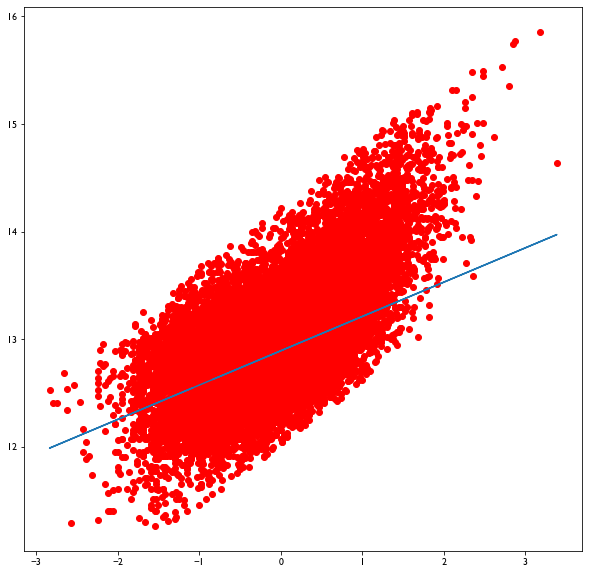

In [87]:
#visualize model for living space correlation

#variable declaration: see model summary for coefficient and intercept values
x = final_df["scl_ln_sqft_living"]
y = final_df["ln_price"]
m = 0.3188
b0 = 12.8938

fig, ax = plt.subplots(figsize=(10,10))
fig = plt.scatter(x=x,y=y, color="red")
#plt.xticks = 
#plt.yticks = 
plt.title = "Living Space vs. House Sale Price"
#plt.xlabel = 
#plt.ylabel = 
plt.plot(x, m*x+b0);

In [88]:
coef_df = pd.DataFrame({'coef': {'ln_sqft_above': -0.1164, 'bedrooms': -0.0303, 'bathrooms': -0.0024, 
                        'ln_sqft_living': 0.3188, 'grade_ord': 0.2023, 'ln_sqft_living15': 0.1017, 
                        'cond_ord': 0.1010, 'floors': 0.0654}})
coef_sorted_df = coef_df.sort_values(by='coef', ascending=False).reset_index()
coef_sorted_df

,index,coef
0,ln_sqft_living,0.3188
1,grade_ord,0.2023
2,ln_sqft_living15,0.1017
3,cond_ord,0.1010
4,floors,0.0654
5,bathrooms,-0.0024
6,bedrooms,-0.0303
7,ln_sqft_above,-0.1164


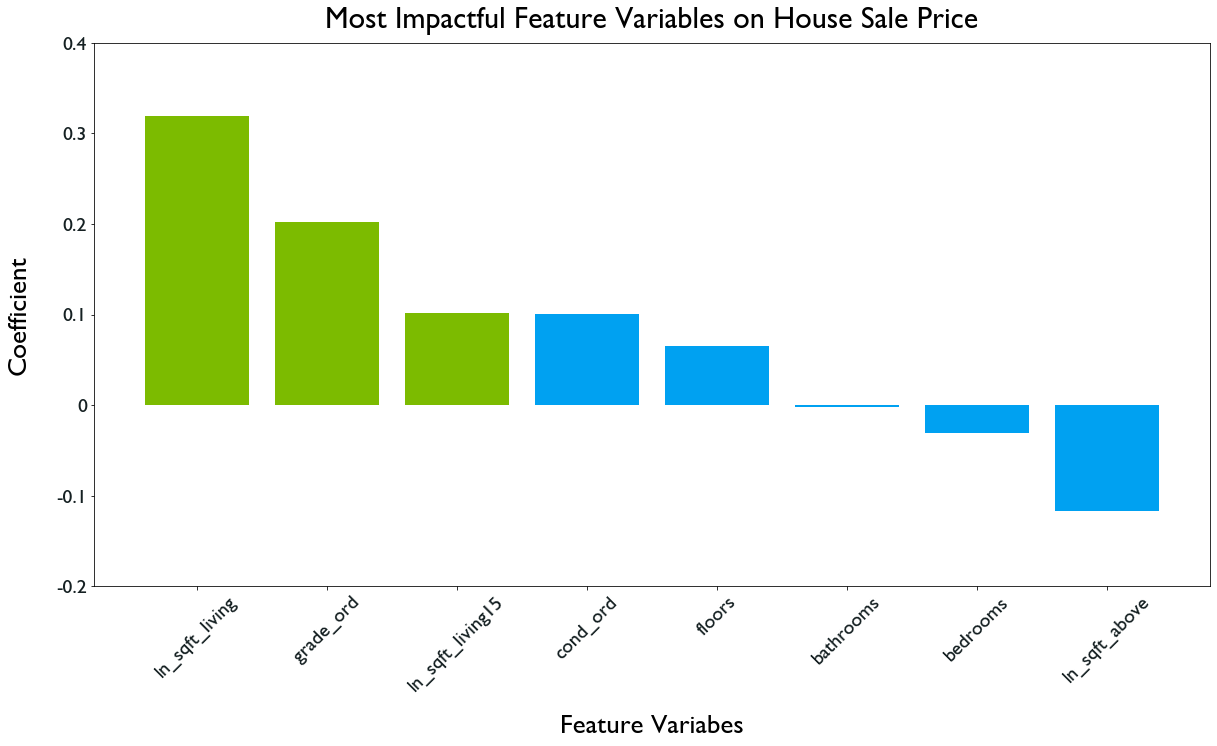

In [89]:
#vizualize model for coefficients

# Create variables for chart
coef_x = coef_sorted_df['index']
coef_y = coef_sorted_df['coef']
y_ticks = [-.2, -.1, 0, .1, .2, .3, .4]
c = ['#34b456', '#34b456', '#34b456', '#747474', '#747474', '#747474', '#747474', '#747474']
# Change font family
plt.rcParams.update({'font.family':'Gill Sans'})

# Create bar chart
fig, ax = plt.subplots(figsize = (20,10))

bars = ax.bar(coef_x, coef_y, color=c)
ax.set_xlabel('Feature Variabes', fontsize=27, labelpad=20)
ax.set_ylabel('Coefficient', fontsize=27, labelpad=25)
ax.set_title('Most Impactful Feature Variables on House Sale Price', fontsize=30, pad=15)
ax.set_ylim(-.2, .4, 1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20, color='#152022')
ax.set_xticks(coef_x)
ax.set_xticklabels(coef_x, fontsize=20, rotation=45, color='#152022');

In [94]:
coef_abs_df = coef_sorted_df
coef_abs_df['coef'] = coef_abs_df['coef'].abs()
coef_abs_sorted_df = coef_abs_df.sort_values(by='coef', ascending=False)

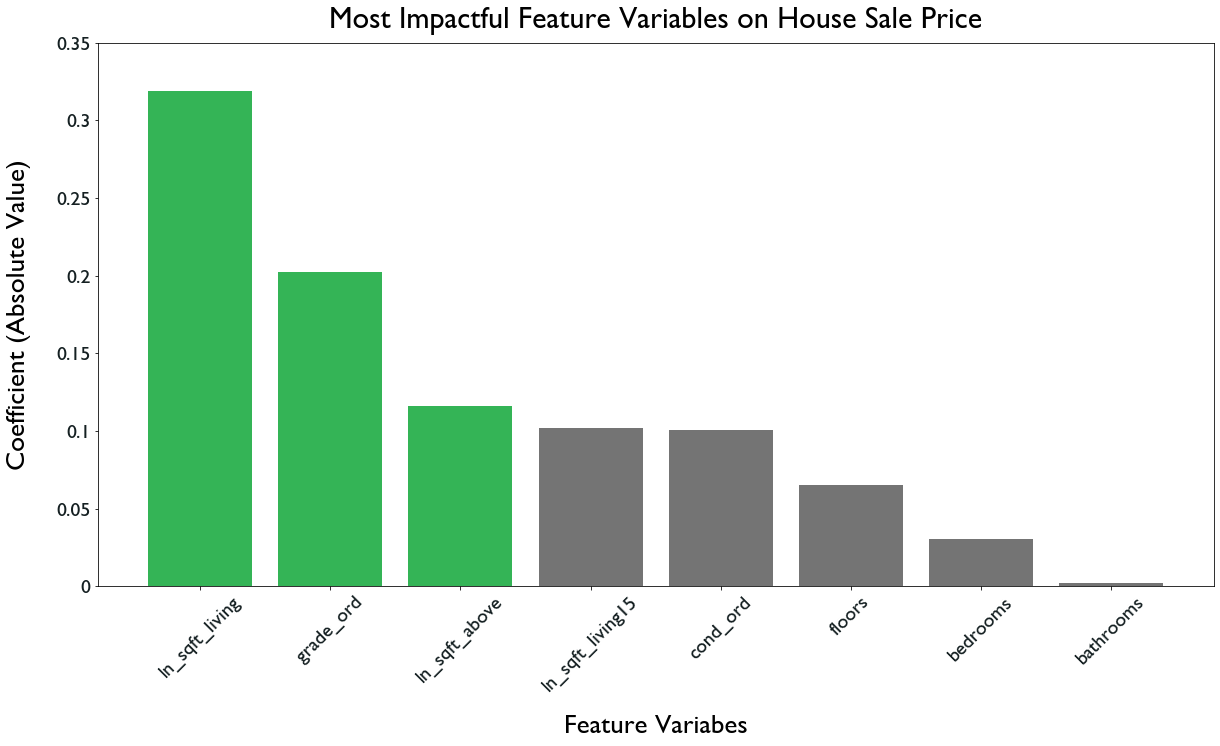

In [98]:
#vizualize model for absolute value of coefficients

# Create variables for chart
coef_x = coef_abs_sorted_df['index']
coef_y = coef_abs_sorted_df['coef']
y_ticks = [0, .05, .1, .15, .2, .25, .3, .35]
c = ['#34b456', '#34b456', '#34b456', '#747474', '#747474', '#747474', '#747474', '#747474']
# Change font family
plt.rcParams.update({'font.family':'Gill Sans'})

# Create bar chart
fig, ax = plt.subplots(figsize = (20,10))

bars = ax.bar(coef_x, coef_y, color=c)
ax.set_xlabel('Feature Variabes', fontsize=27, labelpad=20)
ax.set_ylabel('Coefficient (Absolute Value)', fontsize=27, labelpad=25)
ax.set_title('Most Impactful Feature Variables on House Sale Price', fontsize=30, pad=15)
ax.set_ylim(0, .35, .5)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20, color='#152022')
ax.set_xticks(coef_x)
ax.set_xticklabels(coef_x, fontsize=20, rotation=45, color='#152022');

In [ ]:
#visualize model for assessor grade correlation

In [ ]:
#export coefficient table